Original Image:
Size: 1499277
Shape: (1039, 481, 3)
Data Type:  uint8
First pixel:  [237 220 212]
The mask is the same size as the original image


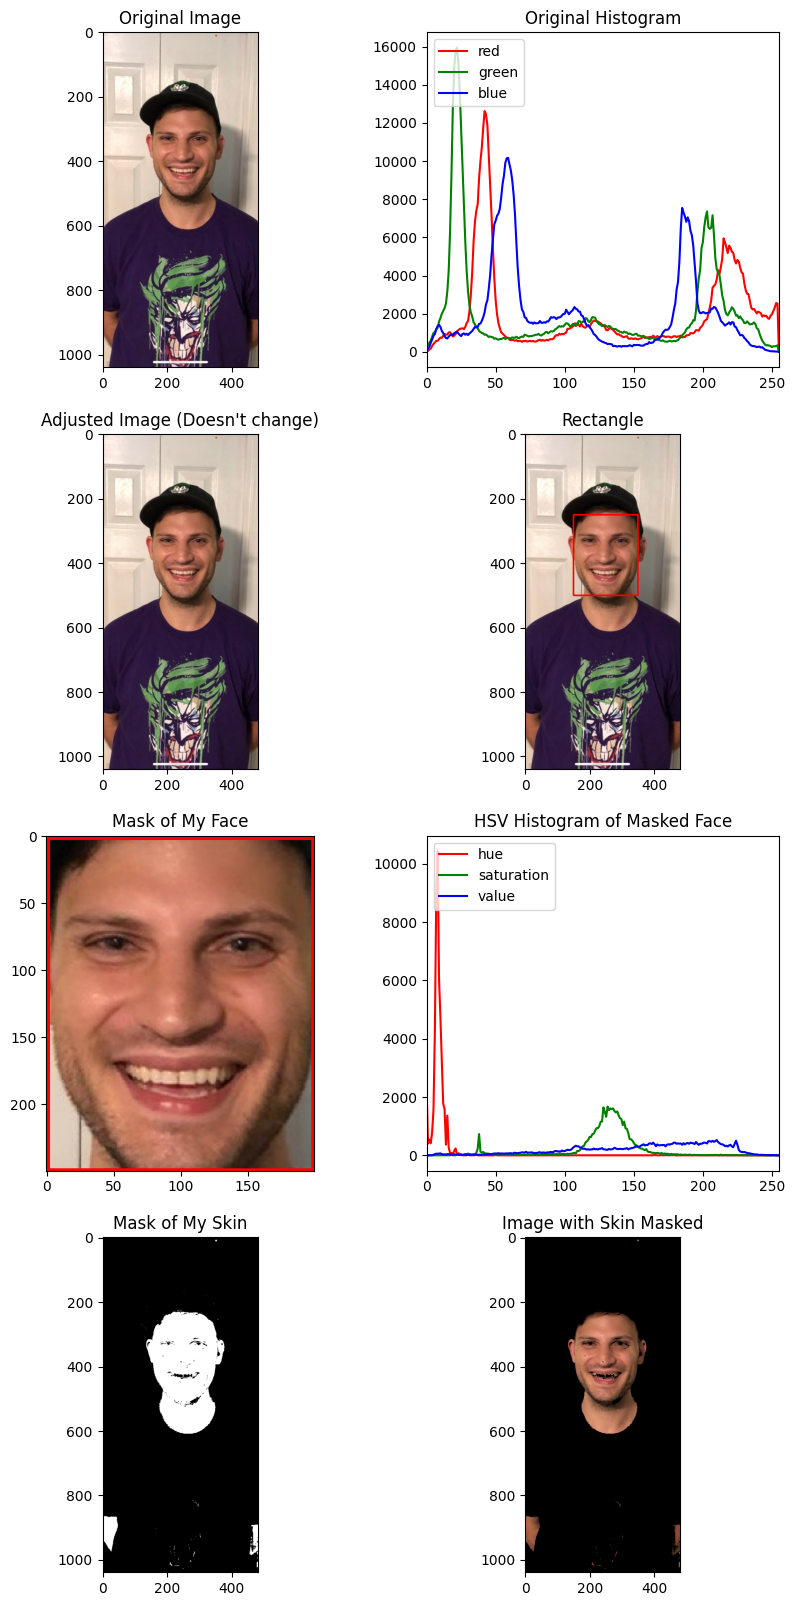

In [1]:
# Import
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read in the image and convert to RGB
img = cv.imread('../images/img5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print("Original Image:")

# Create a figure
plt.figure(figsize = (10, 20))

# Print and analyze original image
print("Size:", img.size)
print("Shape:", img.shape)
print("Data Type: ", img.dtype)
print("First pixel: ", img[0][0])

# Show the original image
plt.subplot(4, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# Create histogram of RGB values throughout the image
plt.subplot(4, 2, 2)
hist = cv.calcHist([img], [0], None, [256], [0, 255])
plt.plot(hist, color = 'red')

hist = cv.calcHist([img], [1], None, [256], [0, 255])
plt.plot(hist, color = 'green')

hist = cv.calcHist([img], [2], None, [256], [0, 255])
plt.plot(hist, color = 'blue')

plt.xlim([0, 255])
plt.legend(('red', 'green', 'blue'), loc = 'upper left')
plt.title("Original Histogram")

# Use OpenCV function to adjust brightness/contrast (no adjustments necessary to fill complete tonal range)
adjusted_img = cv.convertScaleAbs(img, alpha = 1, beta = 0)
plt.subplot(4, 2, 3)
plt.imshow(adjusted_img)
plt.title("Adjusted Image (Doesn't change)")

# Create a rectangle around my face and show it on the image
plt.subplot(4, 2, 4)
top_left = (150, 250)
bottom_right = (350, 500)
rect_color = (255, 0, 0)
thickness = 3
rect = cv.rectangle(img, top_left, bottom_right, rect_color, thickness)
plt.imshow(rect)
plt.title("Rectangle")

# Create a mask using the same values used for the corners of the rectangle
plt.subplot(4, 2, 5)
face_mask = img[250:500, 150:350]
plt.imshow(face_mask)
plt.title("Mask of My Face")

# Convert the image to HSV and plot the HSV histogram
plt.subplot(4, 2, 6)
img_masked_hsv = cv.cvtColor(face_mask, cv.COLOR_RGB2HSV)
hist_masked_hsv = cv.calcHist([img_masked_hsv], [0], None, [256], [0, 255])
plt.plot(hist_masked_hsv, color = 'red')

hist_masked_hsv = cv.calcHist([img_masked_hsv], [1], None, [256], [0, 255])
plt.plot(hist_masked_hsv, color = 'green')

hist_masked_hsv = cv.calcHist([img_masked_hsv], [2], None, [256], [0, 255])
plt.plot(hist_masked_hsv, color = 'blue')

plt.xlim([0, 255])
plt.title("HSV Histogram of Masked Face")
plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')

# Load the image, convert from BGR to RGB then from RGB to HSV
plt.subplot(4, 2, 7)
img_rgb = cv.imread('../images/img5.jpg')
img_rgb = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

# Analyze the Face HSV histogram for skin tonal ranges. Use them to create a mask and show it
mask = cv.inRange(img_hsv, np.uint8([0, 100, 45]), np.uint8([25, 175, 250]))
plt.imshow(mask, cmap = 'gray')
plt.title("Mask of My Skin")

# Check image shape to confirm it's the same size as our image.
if(mask.shape[:2] == img.shape[:2]):
    print("The mask is the same size as the original image")
else:
    print("Error: mask is a different size than the original image")

# Apply the mask to the image, segmenting out my skin and display the masked image
plt.subplot(4, 2, 8)
skin_masked = cv.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(skin_masked)
plt.title("Image with Skin Masked")

# Display the figure
plt.show()